In [67]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    

In [88]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission =pd.read_csv('submission.csv')

In [89]:
train.head()


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [90]:
test.head()


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [91]:
train['type'] = train['type'].map({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].map({'white':0, 'red':1}).astype(int)

In [35]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 97.8 KB


<AxesSubplot:>

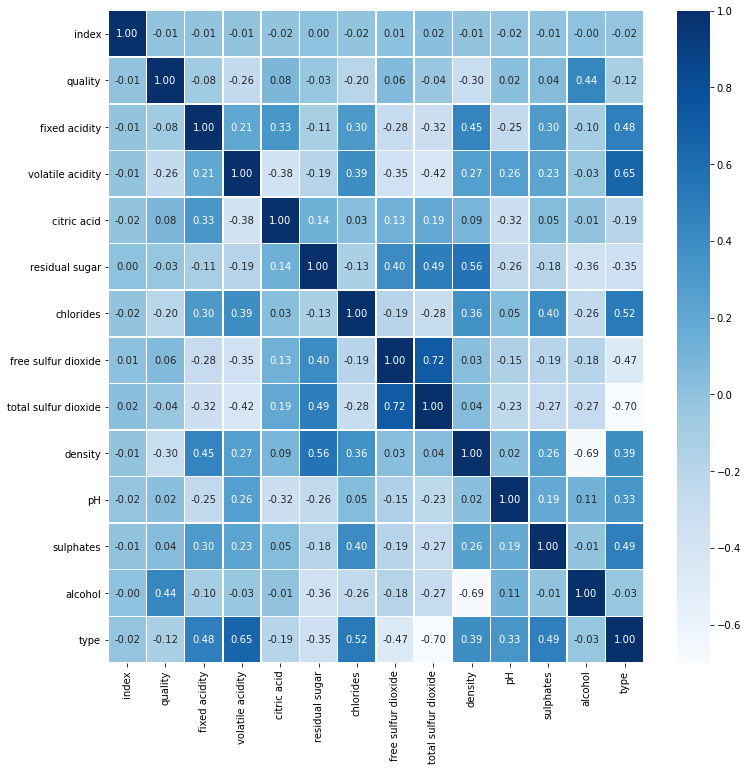

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [73]:
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [94]:
X_train = train.drop(['index', 'quality'], axis = 1)
y_train = train['quality']
X_test = test.drop('index', axis = 1)

In [99]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [100]:
y_train.head()

0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

In [102]:
X_train.shape,y_train.shape, X_test.shape

((5497, 12), (5497,), (1000, 12))

In [105]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param = {'min_samples_split':[10,30,50],
'max_depth':[3,4,5],
'n_estimators':[50,100,150]}

In [108]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [109]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [10, 30, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [110]:
submission['quality'] = gs.predict(X_test)

In [119]:
y_pred=gs.predict(X_test)

In [120]:
y_pred

array([5.8857037 , 5.18790559, 5.44639297, 5.85077248, 6.35803401,
       5.5853622 , 5.66671419, 5.51946619, 5.72698779, 6.60567628,
       5.46861422, 5.23546393, 6.53363756, 5.93759033, 5.66223394,
       5.32296342, 5.63373576, 6.75183558, 5.53488046, 5.4539433 ,
       6.14786513, 6.17863818, 5.18387101, 6.72310328, 5.99081612,
       5.15489383, 5.10553755, 5.30011834, 5.41001566, 5.2947396 ,
       6.76607352, 5.79305576, 5.0784432 , 5.3404799 , 5.4455664 ,
       6.10996526, 5.27975304, 5.62643163, 6.18426611, 5.62199792,
       5.98309516, 5.62758157, 6.12842222, 5.65679116, 6.35754701,
       6.75006847, 5.22306402, 5.91767727, 5.22452426, 5.6825807 ,
       5.43586558, 5.27870326, 5.39388759, 5.36411205, 5.10495443,
       5.48421035, 6.19603441, 5.63428432, 5.40826955, 6.19835477,
       5.1384469 , 6.05650199, 5.58290551, 5.94804057, 6.21552112,
       5.6825807 , 5.50587378, 5.2643846 , 6.02232837, 5.25541444,
       5.36291034, 5.27070081, 5.36481071, 5.35510445, 6.15644

In [122]:
submission['quality'] = y_pred

In [125]:
submission.to_csv('submission.csv', index = False)

In [126]:
gs.best_params_

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 150}

In [127]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195503,0.003728,0.006968,0.000815,3,10,50,"{'max_depth': 3, 'min_samples_split': 10, 'n_e...",-0.557642,-0.545146,-0.550878,-0.551222,0.005107,26
1,0.407858,0.008114,0.012471,0.000406,3,10,100,"{'max_depth': 3, 'min_samples_split': 10, 'n_e...",-0.557426,-0.544738,-0.547243,-0.549802,0.005487,21
2,0.598031,0.005794,0.018955,0.001426,3,10,150,"{'max_depth': 3, 'min_samples_split': 10, 'n_e...",-0.558168,-0.544300,-0.551008,-0.551159,0.005662,25
3,0.202461,0.004116,0.007646,0.000470,3,30,50,"{'max_depth': 3, 'min_samples_split': 30, 'n_e...",-0.559852,-0.546319,-0.548484,-0.551552,0.005935,27
4,0.407553,0.005642,0.013620,0.000948,3,30,100,"{'max_depth': 3, 'min_samples_split': 30, 'n_e...",-0.559068,-0.543279,-0.546720,-0.549689,0.006779,20
5,0.608718,0.012736,0.018616,0.000471,3,30,150,"{'max_depth': 3, 'min_samples_split': 30, 'n_e...",-0.558734,-0.545864,-0.547415,-0.550671,0.005736,24
6,0.198860,0.000484,0.007306,0.000477,3,50,50,"{'max_depth': 3, 'min_samples_split': 50, 'n_e...",-0.557403,-0.546112,-0.546380,-0.549965,0.005261,22
7,0.396855,0.001538,0.012993,0.000791,3,50,100,"{'max_depth': 3, 'min_samples_split': 50, 'n_e...",-0.557556,-0.543922,-0.547505,-0.549661,0.005771,19
8,0.591163,0.004530,0.018268,0.000456,3,50,150,"{'max_depth': 3, 'min_samples_split': 50, 'n_e...",-0.557971,-0.544662,-0.548853,-0.550495,0.005556,23
9,0.250779,0.002456,0.007675,0.000470,4,10,50,"{'max_depth': 4, 'min_samples_split': 10, 'n_e...",-0.536665,-0.520870,-0.525237,-0.527590,0.006660,16


In [128]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [129]:
param = {'min_samples_split': range(30, 80),
        'max_depth': [4, 5, 6],
        'n_estimators': range(40, 240)}

In [130]:
model = RandomForestRegressor()

In [131]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [132]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6],
                                        'min_samples_split': range(30, 80),
                                        'n_estimators': range(40, 240)},
                   random_state=0, scoring='neg_mean_squared_error')

In [133]:
rs.best_params_

{'n_estimators': 197, 'min_samples_split': 33, 'max_depth': 6}

In [134]:
submission['quality'] = rs.predict(X_test)

In [64]:
submission.to_csv('randomsearch.csv', index = False)